# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Aminat Owodunni

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [2]:
df = pd.read_csv('Ulta Skincare Reviews.csv')
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
df.shape

(4150, 10)

In [4]:
df.dtypes

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object

### Data Cleaning

In [5]:
# Check duplicates
df.duplicated().any()

True

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Check null
df.isna().sum()

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# convert review text to lowercase
df['Review_Text'] = df['Review_Text'].str.lower()

# replace special characters, numbers with space
df['Review_Text'] = df['Review_Text'].str.replace('[^\w\s]|[0-9]+', "", regex=True)

In [10]:
df.sample(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
104,Skin brighter and pores are,skin brighter and pores are shrinked after using but i use it with the wet skin otherwise it feels too strong peeling effect for me,No,1 year ago,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4121,Love it,ive been using this for a long time it leaves my face clean and smooth i even use it around my eyes,Yes,7 years ago,Marina Del Rey,0,1,Daily Microfoliant,Dermalogica,3/27/23


# EDA

In [11]:
# Product count
df['Product'].value_counts()

Product
Daily Superfoliant             1495
Daily Microfoliant             1485
Hydro Masque Exfoliant          360
Multi-Vitamin Thermafoliant     350
Name: count, dtype: int64

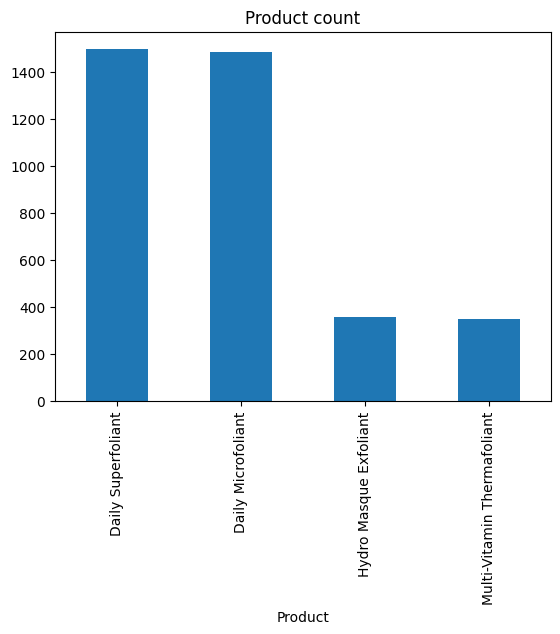

In [12]:
# Product count plot
df.Product.value_counts().plot(kind='bar',title='Product count');

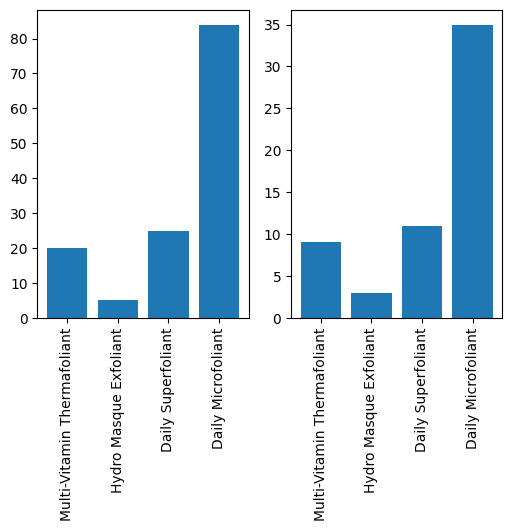

In [13]:
# Review Upvotes and Downvotes
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[6,4])

ax1.bar(df['Product'],df['Review_Upvotes'])
ax1.tick_params('x', labelrotation=90)

ax2.bar(df['Product'],df['Review_Downvotes'])
ax2.tick_params('x', labelrotation=90);

The most common products are daily superfoliant and microfoliant suggest that most customers have the most common skin issues

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [15]:
# Create df for each product
daily_superfoliant = df[df.Product == 'Daily Superfoliant']
daily_microfoliant = df[df.Product == 'Daily Microfoliant']
hydro_masque_exfoliant = df[df.Product == 'Hydro Masque Exfoliant']
multi_vit_thermafoliant = df[df.Product == 'Multi-Vitamin Thermafoliant']

### Daily Superfoliant

In [16]:
# Daily Superfoliant
countVec = CountVectorizer(max_features= 5000, stop_words='english', min_df=.01, max_df=.90)
#use CountVectorizer.fit(self, raw_documents[, y] to learn vocabulary dictionary of all tokens in raw documents
countVec.fit(daily_superfoliant["Review_Text"])
#generate list
list(countVec.vocabulary_.items())

#convert to bag of words
countVec_count = countVec.transform(daily_superfoliant["Review_Text"])

#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

#make a new data frame with columns term and occurrences, meaning word and number of occurences
ListFrame = pd.DataFrame({'Daily Superfoliant_term': countVec.get_feature_names_out(), 'occurrences': occ})
print(ListFrame)

#sort in order of number of word occurences
ListFrame.sort_values(by='occurrences', ascending=False).head(60)

#convert to ranking system, tf-idf weights
Transformer = TfidfTransformer()
Weights = Transformer.fit_transform(countVec_count)

#making new data frame with word occurrences, with term weights
WeightsFin = np.asarray(Weights.mean(axis=0)).ravel().tolist()

#make a dataframe with weights and names
WeightFrame = pd.DataFrame({'Daily Superfoliant_term': countVec.get_feature_names_out(), 'weight': WeightsFin})
print(WeightFrame)
WeightFrame.sort_values(by='weight', ascending=False).head(20)

    Daily Superfoliant_term  occurrences
0                      able           18
1                  abrasive           16
2                absolutely           69
3                      acne           75
4                  actually           39
5                       add           33
6                     aging           22
7                       ago           22
8                   amazing          127
9                     apply           29
10                 applying           17
11                     area           19
12                    areas           18
13                     away           50
14                  awesome           18
15                      bad           28
16                     best           77
17                   better          102
18                      bit           72
19                    black           18
20               blackheads           25
21                   bottle           51
22                   bought           32
23              

,Daily Superfoliant_term,weight
276,skin,0.115669
235,product,0.078950
188,love,0.065079
322,use,0.059285
98,face,0.051434
129,great,0.045641
324,using,0.044543
282,smooth,0.043006
42,cleanser,0.041646
37,clean,0.039111


In [17]:
tfidf = TfidfVectorizer()
tr_data = tfidf.fit_transform(daily_superfoliant["Review_Text"]).toarray()
tr_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
word_vocab_daily_superfoliant = {idx: key for key, idx in tfidf.vocabulary_.items()}
word_vocab_daily_superfoliant

{353: 'bought',
 3247: 'this',
 2173: 'on',
 3554: 'whim',
 1594: 'in',
 3063: 'store',
 272: 'because',
 2153: 'of',
 1402: 'great',
 2682: 'reviews',
 3221: 'the',
 837: 'description',
 2751: 'says',
 2042: 'multiple',
 3275: 'times',
 3219: 'that',
 1681: 'it',
 1675: 'is',
 210: 'at',
 2626: 'removing',
 1876: 'make',
 3426: 'up',
 132: 'and',
 1593: 'impurities',
 3502: 'washed',
 3376: 'twice',
 3575: 'with',
 3049: 'still',
 3297: 'ton',
 1879: 'makeup',
 443: 'came',
 2053: 'my',
 3300: 'toner',
 1693: 'its',
 1552: 'hydrating',
 1417: 'guess',
 1459: 'have',
 2001: 'moderately',
 942: 'dry',
 2893: 'skin',
 98: 'all',
 3624: 'yeat',
 1831: 'long',
 1049: 'every',
 1915: 'mean',
 1047: 'ever',
 546: 'cleanser',
 2205: 'out',
 3227: 'there',
 1574: 'immediately',
 937: 'dries',
 1914: 'me',
 1699: 'ive',
 3443: 'used',
 3466: 'very',
 1098: 'expensive',
 2439: 'products',
 922: 'down',
 3289: 'to',
 941: 'drug',
 278: 'been',
 3448: 'using',
 540: 'cleaning',
 244: 'balm',
 1261

## Daily Microfoliant

In [19]:
# Daily Microfoliant
countVec = CountVectorizer(max_features= 5000, stop_words='english', min_df=.01, max_df=.90)
#use CountVectorizer.fit(self, raw_documents[, y] to learn vocabulary dictionary of all tokens in raw documents
countVec.fit(daily_microfoliant["Review_Text"])
#generate list
list(countVec.vocabulary_.items())

#convert to bag of words
countVec_count = countVec.transform(daily_microfoliant["Review_Text"])

#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

#make a new data frame with columns term and occurrences, meaning word and number of occurences
ListFrame = pd.DataFrame({'Daily Microfoliant': countVec.get_feature_names_out(), 'occurrences': occ})
print(ListFrame)

#sort in order of number of word occurences
ListFrame.sort_values(by='occurrences', ascending=False).head(60)

#convert to ranking system, tf-idf weights
Transformer = TfidfTransformer()
Weights = Transformer.fit_transform(countVec_count)

#making new data frame with word occurrences, with term weights
WeightsFin = np.asarray(Weights.mean(axis=0)).ravel().tolist()

#make a dataframe with weights and names
WeightFrame = pd.DataFrame({'Daily Microfoliant': countVec.get_feature_names_out(), 'weight': WeightsFin})
print(WeightFrame)
WeightFrame.sort_values(by='weight', ascending=False).head(20)

    Daily Microfoliant  occurrences
0                 able           22
1             abrasive           31
2           absolutely           72
3                 acid           29
4                 acne          181
5             actually           35
6                  add           65
7                added           15
8               adding           15
9                  ago           27
10             amazing          110
11         application           28
12               apply           42
13            applying           19
14                away           67
15                baby           40
16                 bad           28
17              beauty           18
18             believe           15
19                best           99
20              better          109
21                 big           19
22                 bit           73
23          blackheads           19
24           blemishes           17
25              bottle           54
26              bought      

,Daily Microfoliant,weight
283,skin,0.113480
241,product,0.079078
327,use,0.073784
193,love,0.063793
100,face,0.046775
330,using,0.044239
121,gentle,0.043101
137,great,0.038292
289,smooth,0.037513
64,daily,0.036019


## Hydro masque exfoliant

In [20]:
# hydro masque exfoliant
countVec = CountVectorizer(max_features= 5000, stop_words='english', min_df=.01, max_df=.90)
#use CountVectorizer.fit(self, raw_documents[, y] to learn vocabulary dictionary of all tokens in raw documents
countVec.fit(hydro_masque_exfoliant["Review_Text"])
#generate list
list(countVec.vocabulary_.items())

#convert to bag of words
countVec_count = countVec.transform(hydro_masque_exfoliant["Review_Text"])

#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

#make a new data frame with columns term and occurrences, meaning word and number of occurences
ListFrame = pd.DataFrame({'Hydro masque Exfoliant': countVec.get_feature_names_out(), 'occurrences': occ})
print(ListFrame)

#sort in order of number of word occurences
ListFrame.sort_values(by='occurrences', ascending=False).head(60)

#convert to ranking system, tf-idf weights
Transformer = TfidfTransformer()
Weights = Transformer.fit_transform(countVec_count)

#making new data frame with word occurrences, with term weights
WeightsFin = np.asarray(Weights.mean(axis=0)).ravel().tolist()

#make a dataframe with weights and names
WeightFrame = pd.DataFrame({'Hydro masque Exfoliant': countVec.get_feature_names_out(), 'weight': WeightsFin})
print(WeightFrame)
WeightFrame.sort_values(by='weight', ascending=False).head(20)

    Hydro masque Exfoliant  occurrences
0                     able            7
1                 abrasive            8
2               absolutely           11
3                     acne            8
4                 actually           11
5                      add            5
6                  amazing           31
7              application            5
8                    apply           21
9                 applying            9
10                    away            5
11                    baby            4
12                     bad            5
13                   balls            7
14                  bamboo            7
15                   beads           28
16                 believe            4
17                    best            7
18                  better            6
19                     big            9
20                     bit           18
21                  bottle           13
22                   brand            6
23                   break            6


,Hydro masque Exfoliant,weight
230,skin,0.110917
197,product,0.075729
158,love,0.067518
166,mask,0.061764
86,face,0.052731
269,use,0.051278
117,great,0.051222
150,like,0.042169
206,really,0.040702
237,soft,0.038340


## Multi vitamin Thermafoliant

In [21]:
# Multi vitamin Thermafoliant
countVec = CountVectorizer(max_features= 5000, stop_words='english', min_df=.01, max_df=.90)
#use CountVectorizer.fit(self, raw_documents[, y] to learn vocabulary dictionary of all tokens in raw documents
countVec.fit(multi_vit_thermafoliant["Review_Text"])
#generate list
list(countVec.vocabulary_.items())

#convert to bag of words
countVec_count = countVec.transform(multi_vit_thermafoliant["Review_Text"])

#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

#make a new data frame with columns term and occurrences, meaning word and number of occurences
ListFrame = pd.DataFrame({'Multi vitamin Thermafoliant': countVec.get_feature_names_out(), 'occurrences': occ})
print(ListFrame)

#sort in order of number of word occurences
ListFrame.sort_values(by='occurrences', ascending=False).head(60)

#convert to ranking system, tf-idf weights
Transformer = TfidfTransformer()
Weights = Transformer.fit_transform(countVec_count)

#making new data frame with word occurrences, with term weights
WeightsFin = np.asarray(Weights.mean(axis=0)).ravel().tolist()

#make a dataframe with weights and names
WeightFrame = pd.DataFrame({'Multi vitamin Thermafoliant': countVec.get_feature_names_out(), 'weight': WeightsFin})
print(WeightFrame)
WeightFrame.sort_values(by='weight', ascending=False).head(20)

    Multi vitamin Thermafoliant  occurrences
0                    absolutely            7
1                          acne            5
2                        action            4
3                           add            6
4                           age            9
5                           ago            6
6                       amazing           27
7                         apply           13
8                      applying            4
9                         areas            5
10                         away            9
11                      awesome            5
12                          bad            5
13                         best           24
14                       better           19
15                          bit           13
16                   blackheads            8
17                       bought            4
18                        brand            4
19                     brighter            8
20                          buy           10
21        

,Multi vitamin Thermafoliant,weight
184,skin,0.110988
122,love,0.079441
154,product,0.076448
222,use,0.074128
191,smooth,0.048808
70,feels,0.048540
64,face,0.046975
87,great,0.044984
112,like,0.043959
236,week,0.042278


###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

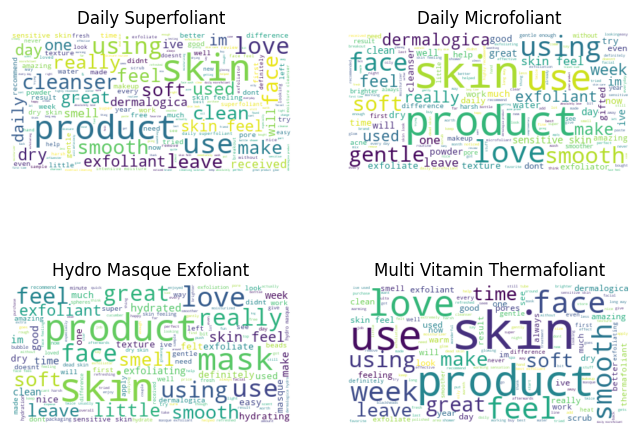

In [22]:
# Word Cloud
text_daily_superfoliant = " ".join(i for i in daily_superfoliant['Review_Text'])
text_daily_microfoliant = " ".join(i for i in daily_microfoliant['Review_Text'])
text_hydro_masque_exfoliant = " ".join(i for i in hydro_masque_exfoliant['Review_Text'])
text_multi_vit_thermafoliant = " ".join(i for i in multi_vit_thermafoliant['Review_Text'])
stopwords = set(STOPWORDS)
wordcloud1 = WordCloud(stopwords=stopwords, background_color='white').generate(text_daily_superfoliant)
wordcloud2 = WordCloud(stopwords=stopwords, background_color='white').generate(text_daily_microfoliant)
wordcloud3 = WordCloud(stopwords=stopwords, background_color='white').generate(text_hydro_masque_exfoliant)
wordcloud4 = WordCloud(stopwords=stopwords, background_color='white').generate(text_multi_vit_thermafoliant)
fig, ax = plt.subplots(2,2, figsize=[8,6])
ax[0,0].imshow(wordcloud1,interpolation='bilinear')
ax[0,0].axis("off")
ax[0,0].set_title('Daily Superfoliant')
ax[0,1].imshow(wordcloud2,interpolation='bilinear')
ax[0,1].axis("off")
ax[0,1].set_title('Daily Microfoliant')
ax[1,0].imshow(wordcloud3,interpolation='bilinear')
ax[1,0].axis("off")
ax[1,0].set_title('Hydro Masque Exfoliant')
ax[1,1].imshow(wordcloud4,interpolation='bilinear')
ax[1,1].axis("off")
ax[1,1].set_title('Multi Vitamin Thermafoliant')
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

## Modeling

In [23]:
from random_word import RandomWords
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [24]:
vds = SentimentIntensityAnalyzer()
r = RandomWords()

In [25]:
text =  r.get_random_word() + " " + r.get_random_word() + " " + r.get_random_word() + " " + r.get_random_word() + " " + r.get_random_word() + " " + r.get_random_word() + " " + r.get_random_word() + " " + r.get_random_word()
text

'piotr codo larviparous posological mirabilite melts aurotellurite advancive'

In [26]:
string_ = 'I love you'

In [27]:
print(vds.polarity_scores(string_))
print(vds.polarity_scores(text))

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [28]:
# Apply sentiment analyzer to review
df['polarity_score'] = df['Review_Text'].apply(lambda review: vds.polarity_scores(review))
df['compound']  = df['polarity_score'].apply(lambda score: score['compound'])
df['sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
df.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,polarity_score,compound,sentiment
0,Perfect,love using this on my face while in the shower heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964,positive
1,You need this,even better than the daily microfoliant im obsessed my skin is so much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,positive


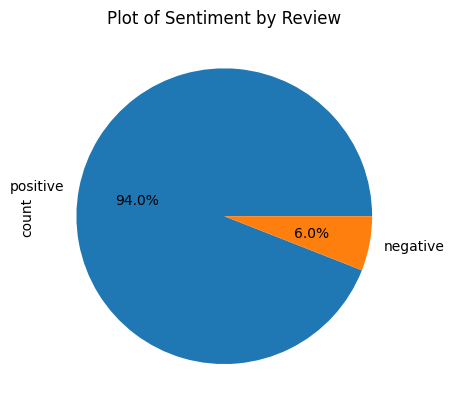

In [29]:
# plot of sentiment by review
df.sentiment.value_counts().plot(kind='pie', title='Plot of Sentiment by Review',autopct='%0.1f%%');

In [30]:
#nltk.download('stopwords')

In [31]:
#nltk.download('wordnet')

In [32]:
# Remove stop words from review text
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = " ".join(word for word in text.split() if word not in stopword)
    return text
  
df['Review_Text'] = df['Review_Text'].apply(clean_stopwords)

In [33]:
# Lemmatization
lem = WordNetLemmatizer()
def lemmatization (text):
    text = [lem.lemmatize(word) for word in text.split() if word in text]
    return " ".join(text)
df['Review_Text'] = df['Review_Text'].apply(lemmatization)

In [34]:
df.head(5)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,polarity_score,compound,sentiment
0,Perfect,love using face shower heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964,positive
1,You need this,even better daily microfoliant im obsessed skin much smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,positive
2,Clean skin,enjoy product much look forward using really feel great,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.8214}",0.8214,positive
3,Love This Stuff!,ive never tried anything like love apply face get little shot warm feel good scrub seems gritty side effect ive encountered positive one,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.029, 'neu': 0.758, 'pos': 0.212, 'compound': 0.8636}",0.8636,positive
4,This exfoliates very nicely and,exfoliates nicely give smooth skin irritation reaction skin highly recommended buy,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.063, 'neu': 0.71, 'pos': 0.227, 'compound': 0.6992}",0.6992,positive


In [35]:
df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
polarity_score      0
compound            0
sentiment           0
dtype: int64

In [36]:
# tdidf
vectorizer = TfidfVectorizer()
vectorizer.fit(df['Review_Text'])
vector = vectorizer.transform(df['Review_Text'])
print(vector)

  (0, 4693)	0.18804088164751828
  (0, 3882)	0.35407433241213787
  (0, 3766)	0.3128550088482472
  (0, 2821)	0.4325688221037486
  (0, 2497)	0.16763844392472294
  (0, 2420)	0.389572980026059
  (0, 1998)	0.48166997614017787
  (0, 1841)	0.32822283311354755
  (0, 1547)	0.18620419651181772
  (1, 4001)	0.36037261942444326
  (1, 3928)	0.12318413632537235
  (1, 2892)	0.4945783659691813
  (1, 2755)	0.30361913913890426
  (1, 2642)	0.3479721246653367
  (1, 2128)	0.29215798084836514
  (1, 1420)	0.34392294340802143
  (1, 998)	0.26736574378120925
  (1, 394)	0.34922282961330564
  (2, 4693)	0.22417957127753677
  (2, 3438)	0.2678232567694583
  (2, 3295)	0.16011095089801675
  (2, 2755)	0.3053030682169983
  (2, 2475)	0.3150106280463241
  (2, 1907)	0.25709137238623875
  (2, 1740)	0.5455098300383014
  :	:
  (3688, 3295)	0.06327735584341267
  (3688, 2342)	0.24672983495738243
  (3688, 1977)	0.19339629347992807
  (3688, 1818)	0.10407687586560897
  (3688, 1803)	0.1884683204340399
  (3688, 1773)	0.188468320434039

In [37]:
# Relace target variable
df['sentiment'] =df['sentiment'].str.replace('negative','0')
df['sentiment'] =df['sentiment'].str.replace('positive','1')

In [38]:
# Convert sentiment to int data type
df['sentiment']= df['sentiment'].astype(int)

In [39]:
# Split Data
X = df['Review_Text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2)

In [40]:
# create logistic regression model
logreg = LogisticRegression()
# train model on  vectorised training data
model = logreg.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [41]:
y_pred,y_proba

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [42]:
y_test.value_counts(normalize=True)

sentiment
1    0.949864
0    0.050136
Name: proportion, dtype: float64

In [43]:
# Evaluate Model
labels = ['0', '1']
labels = ["Negative", "Positive"]


conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[  0,  37],
       [  0, 701]], dtype=int64)

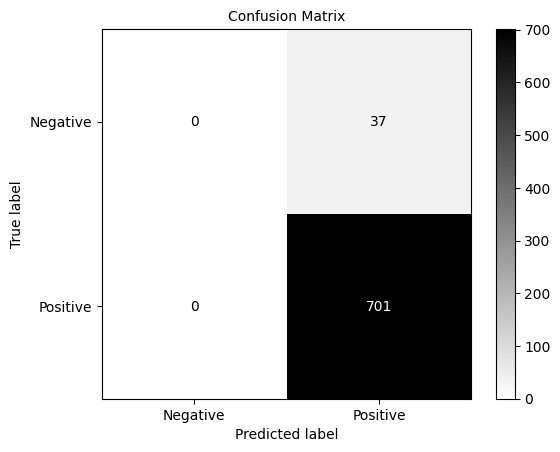

In [44]:
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
import matplotlib.pyplot as plt
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=10)
plt.show()

In [45]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.95      1.00      0.97       701

    accuracy                           0.95       738
   macro avg       0.47      0.50      0.49       738
weighted avg       0.90      0.95      0.93       738



c:\Users\Aminat\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aminat\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Aminat\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Accuracy score
model.score(X_test,y_test)

0.9498644986449865

In [47]:
# Model auc_score
auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_proba)
auc_score

0.8774723368161315

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_proba)

auc_score = metrics.auc(fpr, tpr)
auc_score

0.8774723368161315

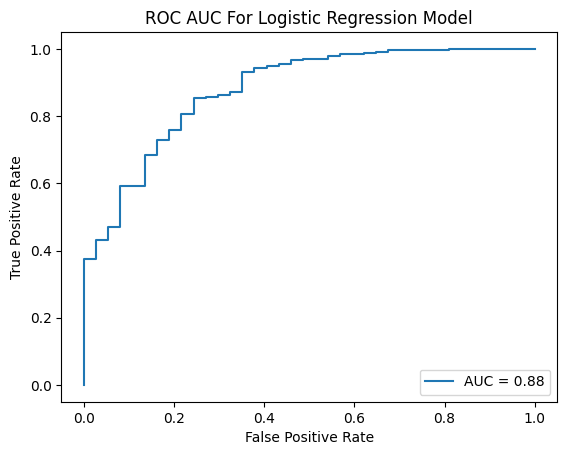

In [49]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=None)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")
plt.show()